# Sumary
- In this notebook we retrain the downstream task after having the upstream task ready. 
- This notebook doesn't include fine-tuning.

# Setup

In [1]:
import os
os.chdir('/home/david/Desktop/projects/thesis/')

import torch
from combined_downstream_upstram.executors.train_combined_model import trainer
from combined_downstream_upstram.utils.LoadModels import load_upstream_model, get_best_upsteam_model
from downstream_classification.modeling.Inception import *
from upstream_seq2seq.modeling.Transformer import TSTransformerEncoderCNN

cuda


/home/david/anaconda3/envs/thesis_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Not continue training upsteam model, impute only missing

In [2]:
# Globals
# ---------------
device =  torch.device('cuda' if torch.cuda.is_available() else 'cpu')
lr = 0.005
class_weight = 66
weight_decay = 0.001
loss_function_weight = torch.tensor([class_weight]).to(device)

# upstream model params
# ---------------
upstream_params = {
    'input_dimension': 12,
    'output_dimension': 12,              
    'hidden_dimmension':  128,           # d_model (int) – the number of expected features in the input (required)???,
    'attention_heads': 8,               # number of attention heads, if None then d_model//64,
    'encoder_number_of_layers': 8,
    'dropout': 0.4,
    'clip': 1,
    'positional_encodings': False,
    'device':device
}


# load models
# ---------------
downstream_model = DownstreamInception(dropout = 0.4, num_inputs=12)
upstream_model   = load_upstream_model(upstream_params, folder_path = './upstream_seq2seq/models/', model_name = 'transformer_cnn_4heads')


# configuration
# ---------------
config = {
   # general
   'seed': 123,
   'metadata_file_path': './downstream_classification/data/combined_data/metadata_only_existant_readings_09042023.csv',
   'data_folder_path': './downstream_classification/data/individual-signals/',
   'fillna': 0,
   # training
   'batch_size': 64,
   'n_epochs': 10,
   'clip':1,
   'loss_function_weight':loss_function_weight,
   'targets': ['one_year_until_death'],
   'saving_path': f'./combined_downstream_upstram/models/comined_model_training/biggen_and_harder_upstream_network_upstream_not_trained_{lr}_{class_weight}_{weight_decay}',
   'lr': lr,
   'impute_only_missing':True,
   'weight_decay':weight_decay,
   'patience':5,
   # new params
   'upstream_model':upstream_model,
   'downstream_model':downstream_model,
   'continue_training_upstream_model':False,
            }

Num attention heads: 8




training using device: cuda


2246929


Within epoch loss (validation) 8.64595: 100%|██████████| 832/832 [02:02<00:00,  6.80it/s]
/home/david/anaconda3/envs/thesis_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/david/anaconda3/envs/thesis_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/david/anaconda3/envs/thesis_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/david/anaconda3/envs/thesis_env/lib/python3.11/site-packages/sea

New best validation loss was found, current best valid loss is 8.646


/home/david/anaconda3/envs/thesis_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/david/anaconda3/envs/thesis_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/david/anaconda3/envs/thesis_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/david/anaconda3/envs/thesis_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

---------------------------------------------
Epoch: 01 | Time: 15m 33s
	Train Loss: 10.011
	 Val. Loss: 8.646
	 ROC-AUC: 0.484
	 PR-AUC: 0.028
	 TPR for FPR=0.6 Budget: 0.577
	 Best Val. Loss: 8.646
---------------------------------------------


Within epoch loss (validation) 7.91468: 100%|██████████| 832/832 [01:58<00:00,  7.02it/s]
/home/david/anaconda3/envs/thesis_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/david/anaconda3/envs/thesis_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/david/anaconda3/envs/thesis_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/david/anaconda3/envs/thesis_env/lib/python3.11/site-packages/sea

New best validation loss was found, current best valid loss is 7.9147


/home/david/anaconda3/envs/thesis_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/david/anaconda3/envs/thesis_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/david/anaconda3/envs/thesis_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/david/anaconda3/envs/thesis_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

---------------------------------------------
Epoch: 02 | Time: 15m 27s
	Train Loss: 8.843
	 Val. Loss: 7.915
	 ROC-AUC: 0.608
	 PR-AUC: 0.041
	 TPR for FPR=0.6 Budget: 0.747
	 Best Val. Loss: 7.915
---------------------------------------------


Within epoch loss (validation) 8.16796: 100%|██████████| 832/832 [02:00<00:00,  6.91it/s]


---------------------------------------------
Epoch: 03 | Time: 15m 19s
	Train Loss: 8.727
	 Val. Loss: 8.168
	 ROC-AUC: 0.574
	 PR-AUC: 0.033
	 TPR for FPR=0.6 Budget: 0.705
	 Best Val. Loss: 7.915
---------------------------------------------


Within epoch loss (validation) 8.33323: 100%|██████████| 832/832 [01:51<00:00,  7.48it/s]


---------------------------------------------
Epoch: 04 | Time: 15m 30s
	Train Loss: 8.660
	 Val. Loss: 8.333
	 ROC-AUC: 0.616
	 PR-AUC: 0.041
	 TPR for FPR=0.6 Budget: 0.729
	 Best Val. Loss: 7.915
---------------------------------------------


Within epoch loss (validation) 8.38933: 100%|██████████| 832/832 [01:54<00:00,  7.25it/s]


---------------------------------------------
Epoch: 05 | Time: 15m 23s
	Train Loss: 8.633
	 Val. Loss: 8.389
	 ROC-AUC: 0.611
	 PR-AUC: 0.042
	 TPR for FPR=0.6 Budget: 0.735
	 Best Val. Loss: 7.915
---------------------------------------------


Within epoch loss (validation) 8.22577: 100%|██████████| 832/832 [01:56<00:00,  7.11it/s]


---------------------------------------------
Epoch: 06 | Time: 15m 38s
	Train Loss: 8.605
	 Val. Loss: 8.226
	 ROC-AUC: 0.617
	 PR-AUC: 0.044
	 TPR for FPR=0.6 Budget: 0.742
	 Best Val. Loss: 7.915
---------------------------------------------


Within epoch loss (training) 8.56294:  62%|██████▏   | 2555/4103 [08:36<05:12,  4.95it/s] 


KeyboardInterrupt: 

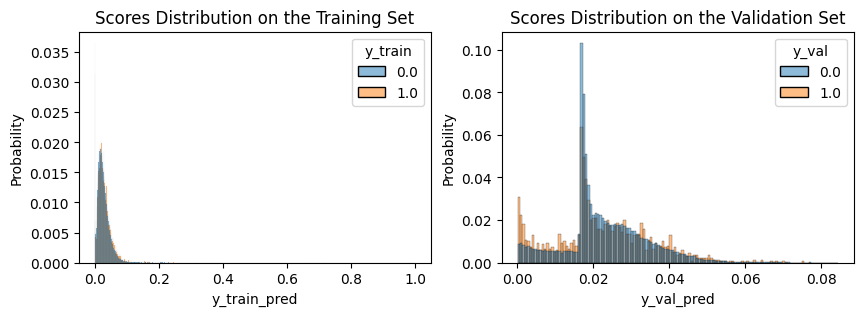

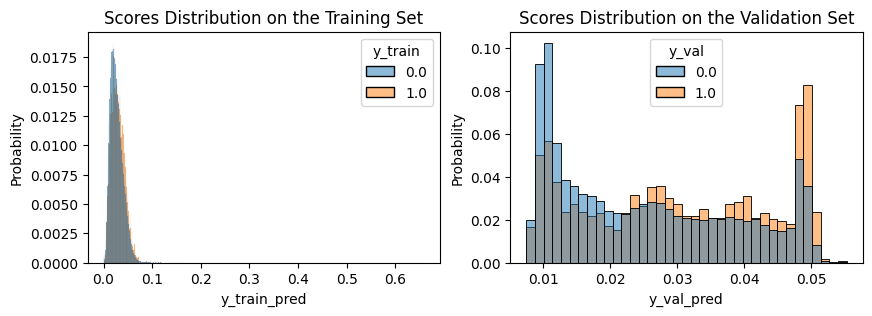

In [3]:
# run
# ---------------
trainer(**config)

In [ ]:
import sys
sys.exit(0)

# Not continue training upsteam model, impute All

Num attention heads: 8


training using device: cuda


2246929


Within epoch loss (validation) 8.08599: 100%|██████████| 832/832 [01:58<00:00,  7.02it/s]
/home/david/anaconda3/envs/thesis_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/david/anaconda3/envs/thesis_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/david/anaconda3/envs/thesis_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/david/anaconda3/envs/thesis_env/lib/python3.11/site-packages/sea

New best validation loss was found, current best valid loss is 8.086


/home/david/anaconda3/envs/thesis_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/david/anaconda3/envs/thesis_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/david/anaconda3/envs/thesis_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/david/anaconda3/envs/thesis_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

---------------------------------------------
Epoch: 01 | Time: 13m 31s
	Train Loss: 10.104
	 Val. Loss: 8.086
	 ROC-AUC: 0.563
	 PR-AUC: 0.033
	 TPR for FPR=0.6 Budget: 0.684
	 Best Val. Loss: 8.086
---------------------------------------------


Within epoch loss (validation) 9.10096: 100%|██████████| 832/832 [01:53<00:00,  7.31it/s]


---------------------------------------------
Epoch: 02 | Time: 16m 47s
	Train Loss: 8.854
	 Val. Loss: 9.101
	 ROC-AUC: 0.578
	 PR-AUC: 0.036
	 TPR for FPR=0.6 Budget: 0.691
	 Best Val. Loss: 8.086
---------------------------------------------


Within epoch loss (validation) 8.15642: 100%|██████████| 832/832 [01:53<00:00,  7.32it/s]


---------------------------------------------
Epoch: 03 | Time: 14m 53s
	Train Loss: 8.729
	 Val. Loss: 8.156
	 ROC-AUC: 0.611
	 PR-AUC: 0.041
	 TPR for FPR=0.6 Budget: 0.730
	 Best Val. Loss: 8.086
---------------------------------------------


Within epoch loss (validation) 8.14979: 100%|██████████| 832/832 [01:52<00:00,  7.38it/s]


---------------------------------------------
Epoch: 04 | Time: 15m 25s
	Train Loss: 8.709
	 Val. Loss: 8.150
	 ROC-AUC: 0.623
	 PR-AUC: 0.042
	 TPR for FPR=0.6 Budget: 0.735
	 Best Val. Loss: 8.086
---------------------------------------------


Within epoch loss (validation) 9.01124: 100%|██████████| 832/832 [01:53<00:00,  7.32it/s]


---------------------------------------------
Epoch: 05 | Time: 14m 52s
	Train Loss: 8.750
	 Val. Loss: 9.011
	 ROC-AUC: 0.614
	 PR-AUC: 0.102
	 TPR for FPR=0.6 Budget: 0.744
	 Best Val. Loss: 8.086
---------------------------------------------


Within epoch loss (validation) 8.79068: 100%|██████████| 832/832 [01:52<00:00,  7.38it/s]


---------------------------------------------
Epoch: 06 | Time: 14m 52s
	Train Loss: 8.706
	 Val. Loss: 8.791
	 ROC-AUC: 0.622
	 PR-AUC: 0.041
	 TPR for FPR=0.6 Budget: 0.740
	 Best Val. Loss: 8.086
---------------------------------------------


Within epoch loss (validation) 8.78461: 100%|██████████| 832/832 [01:55<00:00,  7.18it/s]


UnboundLocalError: cannot access local variable 'rocauc_given_best_aucpr' where it is not associated with a value

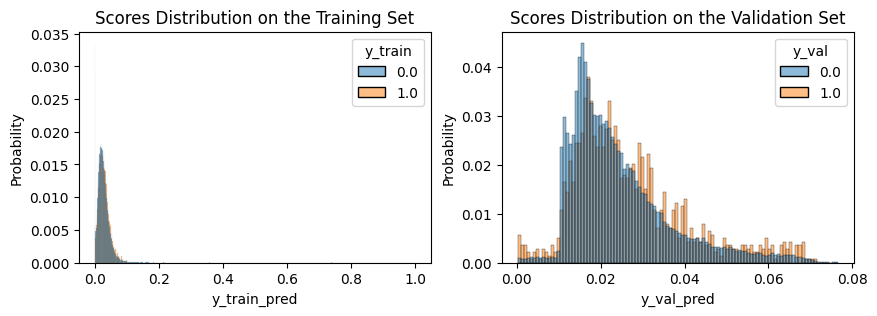

In [4]:
# Globals
# ---------------
device =  torch.device('cuda' if torch.cuda.is_available() else 'cpu')
lr = 0.005
class_weight = 66
weight_decay = 0.001
loss_function_weight = torch.tensor([class_weight]).to(device)

# upstream model params
# ---------------
upstream_params = {
    'input_dimension': 12,
    'output_dimension': 12,              
    'hidden_dimmension':  128,           # d_model (int) – the number of expected features in the input (required)???,
    'attention_heads': 8,               # number of attention heads, if None then d_model//64,
    'encoder_number_of_layers': 8,
    'dropout': 0.4,
    'clip': 1,
    'positional_encodings': False,
    'device':device
}


# load models
# ---------------
downstream_model = DownstreamInception(dropout = 0.4, num_inputs=12)
upstream_model   = load_upstream_model(upstream_params, folder_path = './upstream_seq2seq/models/', model_name = 'transformer_cnn_4heads')


# configuration
# ---------------
config = {
   # general
   'seed': 123,
   'metadata_file_path': './downstream_classification/data/combined_data/metadata_only_existant_readings_09042023.csv',
   'data_folder_path': './downstream_classification/data/individual-signals/',
   'fillna': 0,
   # training
   'batch_size': 64,
   'n_epochs': 10,
   'clip':1,
   'loss_function_weight':loss_function_weight,
   'targets': ['one_year_until_death'],
   'saving_path': f'./combined_downstream_upstram/models/comined_model_training/bigger_and_harder_upstream_network_upstream_not_trained_impute_all_{lr}_{class_weight}_{weight_decay}',
   'lr': lr,
   'impute_only_missing':False,
   'weight_decay':weight_decay,
   'patience':5,
   # new params
   'upstream_model':upstream_model,
   'downstream_model':downstream_model,
   'continue_training_upstream_model':False,
            }

# run
# ---------------
trainer(**config)

# Impute all, continue training

In [2]:
# Globals
# ---------------
device =  torch.device('cuda' if torch.cuda.is_available() else 'cpu')
lr = 0.005
class_weight = 66
weight_decay = 0.001
loss_function_weight = torch.tensor([class_weight]).to(device)

# upstream model params
# ---------------
upstream_params = {
    'input_dimension': 12,
    'output_dimension': 12,              
    'hidden_dimmension':  128,           # d_model (int) – the number of expected features in the input (required)???,
    'attention_heads': 8,               # number of attention heads, if None then d_model//64,
    'encoder_number_of_layers': 8,
    'dropout': 0.4,
    'clip': 1,
    'positional_encodings': False,
    'device':device
}


# load models
# ---------------
downstream_model = DownstreamInception(dropout = 0.4, num_inputs=12)
upstream_model   = load_upstream_model(upstream_params, folder_path = './upstream_seq2seq/models/', model_name = 'transformer_cnn_4heads')


# configuration
# ---------------
config = {
   # general
   'seed': 123,
   'metadata_file_path': './downstream_classification/data/combined_data/metadata_only_existant_readings_09042023.csv',
   'data_folder_path': './downstream_classification/data/individual-signals/',
   'fillna': 0,
   # training
   'batch_size': 64,
   'n_epochs': 10,
   'clip':1,
   'loss_function_weight':loss_function_weight,
   'targets': ['one_year_until_death'],
   'saving_path': f'./combined_downstream_upstram/models/comined_model_training/bigger_and_harder_upstream_network_upstream_not_trained_impute_all_{lr}_{class_weight}_{weight_decay}',
   'lr': lr,
   'impute_only_missing':False,
   'weight_decay':weight_decay,
   'patience':5,
   # new params
   'upstream_model':upstream_model,
   'downstream_model':downstream_model,
   'continue_training_upstream_model':True,
            }

# run
# ---------------
trainer(**config)

Num attention heads: 8


training using device: cuda


2246929


Within epoch loss (training):   0%|          | 0/4103 [00:01<?, ?it/s]


OutOfMemoryError: CUDA out of memory. Tried to allocate 396.00 MiB (GPU 0; 7.80 GiB total capacity; 6.93 GiB already allocated; 21.88 MiB free; 7.10 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF